In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sksurv.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('clean_data.csv', sep=',')
df = df.sample(frac=1).reset_index(drop=True)
df = df[df.Job_Function__IA__Host_All_Other != 'Operations']
df['delta'] = df['delta'].astype(bool)

In [4]:
# generate 2d classification dataset
#X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
data_x = df.drop(["delta", "Termination_Reason"], axis=1)
for c in data_x.columns:
    if data_x[c].dtype == object:
        print(c)
        data_x[c] = data_x[c].astype('category')
data_x = data_x.drop(["Job_Sub_Function__IA__Host_All_O"], axis=1)

Job_Sub_Function__IA__Host_All_O
Job_Function__IA__Host_All_Other
Rehire_YN
Employee_Rating_1_W
Employee_Rating_1_H
Employee_Rating_2_W
Employee_Rating_2_H
Employee_Rating_3_W
Employee_Rating_3_H
Manager_Rating_1_W
Manager_Rating_1_H
Manager_Rating_2_W
Manager_Rating_2_H
Manager_Rating_3_W
Manager_Rating_3_H


In [5]:
data_x['Rehire_YN'] = data_x['Rehire_YN'].cat.codes
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 0 to 7454
Data columns (total 37 columns):
Unnamed: 0                          4668 non-null int64
WWID                                4668 non-null int64
Compensation_Range___Midpoint       4668 non-null int64
Total_Base_Pay___Local              4668 non-null float64
Length_of_Service_in_Years_inclu    4668 non-null float64
Job_Function__IA__Host_All_Other    4668 non-null category
Promotion                           4668 non-null int64
Demotion                            4668 non-null int64
Lateral                             4668 non-null int64
Cross_Move                          4668 non-null int64
Trainings_Completed                 4668 non-null float64
Mgr_Change                          4668 non-null int64
SkipLevel_Mgr_Change                4668 non-null int64
Rehire_YN                           4668 non-null int8
_018_Planned_as_a___of_Bonus_Tar    4668 non-null float64
_017_Planned_as_a___of_Bonus_Tar    4668 no

In [6]:
data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Unnamed: 0,WWID,Compensation_Range___Midpoint,Total_Base_Pay___Local,Length_of_Service_in_Years_inclu,Job_Function__IA__Host_All_Other=Facilities,Job_Function__IA__Host_All_Other=Finance,Job_Function__IA__Host_All_Other=General Administration,Job_Function__IA__Host_All_Other=General Management,Job_Function__IA__Host_All_Other=Human Resources,...,Manager_Rating_2_H=4,Manager_Rating_2_H=Missing,Manager_Rating_3_W=2,Manager_Rating_3_W=3,Manager_Rating_3_W=4,Manager_Rating_3_W=Missing,Manager_Rating_3_H=3,Manager_Rating_3_H=4,Manager_Rating_3_H=Missing,Job_Function_encoded
0,730,1011603,150000,147233.44,8.14,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,6434,75582905,81000,103625.60,13.61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,5615,75361062,237000,268403.44,28.45,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
3,7493,84004223,62000,50892.43,10.37,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
4,1727,1030941,150000,134733.44,5.39,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


In [7]:
data_x_numeric = data_x_numeric.drop(["Unnamed: 0"], axis=1)

In [8]:
for c in data_x_numeric.columns:
    if 'Missing' in c:
        print(c)
        data_x_numeric = data_x_numeric.drop(c, axis=1)

Employee_Rating_1_W=Missing
Employee_Rating_1_H=Missing
Employee_Rating_2_W=Missing
Employee_Rating_2_H=Missing
Employee_Rating_3_W=Missing
Employee_Rating_3_H=Missing
Manager_Rating_1_W=Missing
Manager_Rating_1_H=Missing
Manager_Rating_2_W=Missing
Manager_Rating_2_H=Missing
Manager_Rating_3_W=Missing
Manager_Rating_3_H=Missing


In [9]:
data_x_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 0 to 7454
Data columns (total 71 columns):
WWID                                                       4668 non-null int64
Compensation_Range___Midpoint                              4668 non-null int64
Total_Base_Pay___Local                                     4668 non-null float64
Length_of_Service_in_Years_inclu                           4668 non-null float64
Job_Function__IA__Host_All_Other=Facilities                4668 non-null float64
Job_Function__IA__Host_All_Other=Finance                   4668 non-null float64
Job_Function__IA__Host_All_Other=General Administration    4668 non-null float64
Job_Function__IA__Host_All_Other=General Management        4668 non-null float64
Job_Function__IA__Host_All_Other=Human Resources           4668 non-null float64
Job_Function__IA__Host_All_Other=Info Technology           4668 non-null float64
Job_Function__IA__Host_All_Other=Legal                     4668 non-null float64
Job_Fu

In [10]:
data_y = pd.Series()
data_y['Status'] = df['delta']

In [11]:
# fit final model
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(data_x_numeric[:4000], data_y.Status[:4000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
ynew = model.predict_proba(data_x_numeric[4000:])

In [13]:
data_x_numeric.values[4000]

array([ 1.00466800e+06,  2.44000000e+05,  2.20263440e+05,  9.38000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  4.00000000e+00,  3.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.47082000e-01,  1.13223500e+00,
        1.17548800e+00, -9.99000000e+02, -9.72809836e-02,  9.02719016e-01,
        2.33988088e+00, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  

In [14]:
# define one new instance
Xnew = [data_x_numeric.values[4000]]

In [15]:
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0][1], ynew[0]))

X=244000.0, Predicted=False


In [16]:
ynew = model.predict_proba(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0][1], ynew[0]))

X=244000.0, Predicted=[0.88060024 0.11939976]


In [17]:
data_y.Status.values

array([False, False, False, ..., False, False, False])

In [18]:
Xnew = data_x_numeric.values[4000:]
# make a prediction
ynew = model.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
    if data_y.Status.values[4000+i]:
        print("X=%s, Predicted=%s, Actual=%s" % (Xnew[i][1], ynew[i], data_y.Status.values[4000+i]))

X=44000.0, Predicted=[0.71908729 0.28091271], Actual=True
X=105160.0, Predicted=[0.85094623 0.14905377], Actual=True
X=61310.0, Predicted=[0.71068084 0.28931916], Actual=True
X=46000.0, Predicted=[0.82849087 0.17150913], Actual=True
X=134000.0, Predicted=[0.82907411 0.17092589], Actual=True
X=101000.0, Predicted=[0.83668592 0.16331408], Actual=True
X=230220.0, Predicted=[0.96179846 0.03820154], Actual=True
X=62000.0, Predicted=[0.50416318 0.49583682], Actual=True
X=105160.0, Predicted=[0.89565669 0.10434331], Actual=True
X=36540.0, Predicted=[0.73401199 0.26598801], Actual=True
X=58000.0, Predicted=[0.64346075 0.35653925], Actual=True
X=217800.0, Predicted=[0.94942813 0.05057187], Actual=True
X=77400.0, Predicted=[0.58917794 0.41082206], Actual=True
X=46000.0, Predicted=[0.54560691 0.45439309], Actual=True
X=1000000000.0, Predicted=[2.67545096e-05 9.99973245e-01], Actual=True
X=81310.0, Predicted=[0.75086361 0.24913639], Actual=True
X=1000000000.0, Predicted=[3.16107093e-05 9.99968389e

In [19]:
import matplotlib.pyplot as plt

In [20]:
active = [x[1] for i,x in enumerate(ynew) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew) if data_y.Status.values[4000+i]]

Text(0.5, 0, 'Resignation Probability')

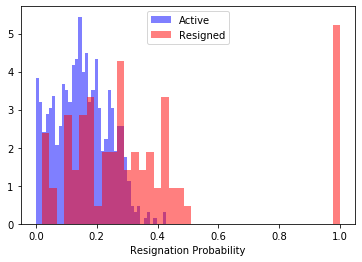

In [21]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Active', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")
ax.legend(loc='best')
plt.xlabel("Resignation Probability")

In [22]:
import sklearn
from sklearn import tree

In [23]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [24]:
clf = tree.DecisionTreeClassifier()

In [25]:
clf = clf.fit(data_x_numeric[:4000], data_y.Status[:4000])

In [26]:
!pip install -q graphviz
import graphviz

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/jchaves6/Documents/graphviz-2.38/release/bin/'

In [28]:
columns=list(data_x_numeric.columns)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)

'image.pdf'

In [29]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

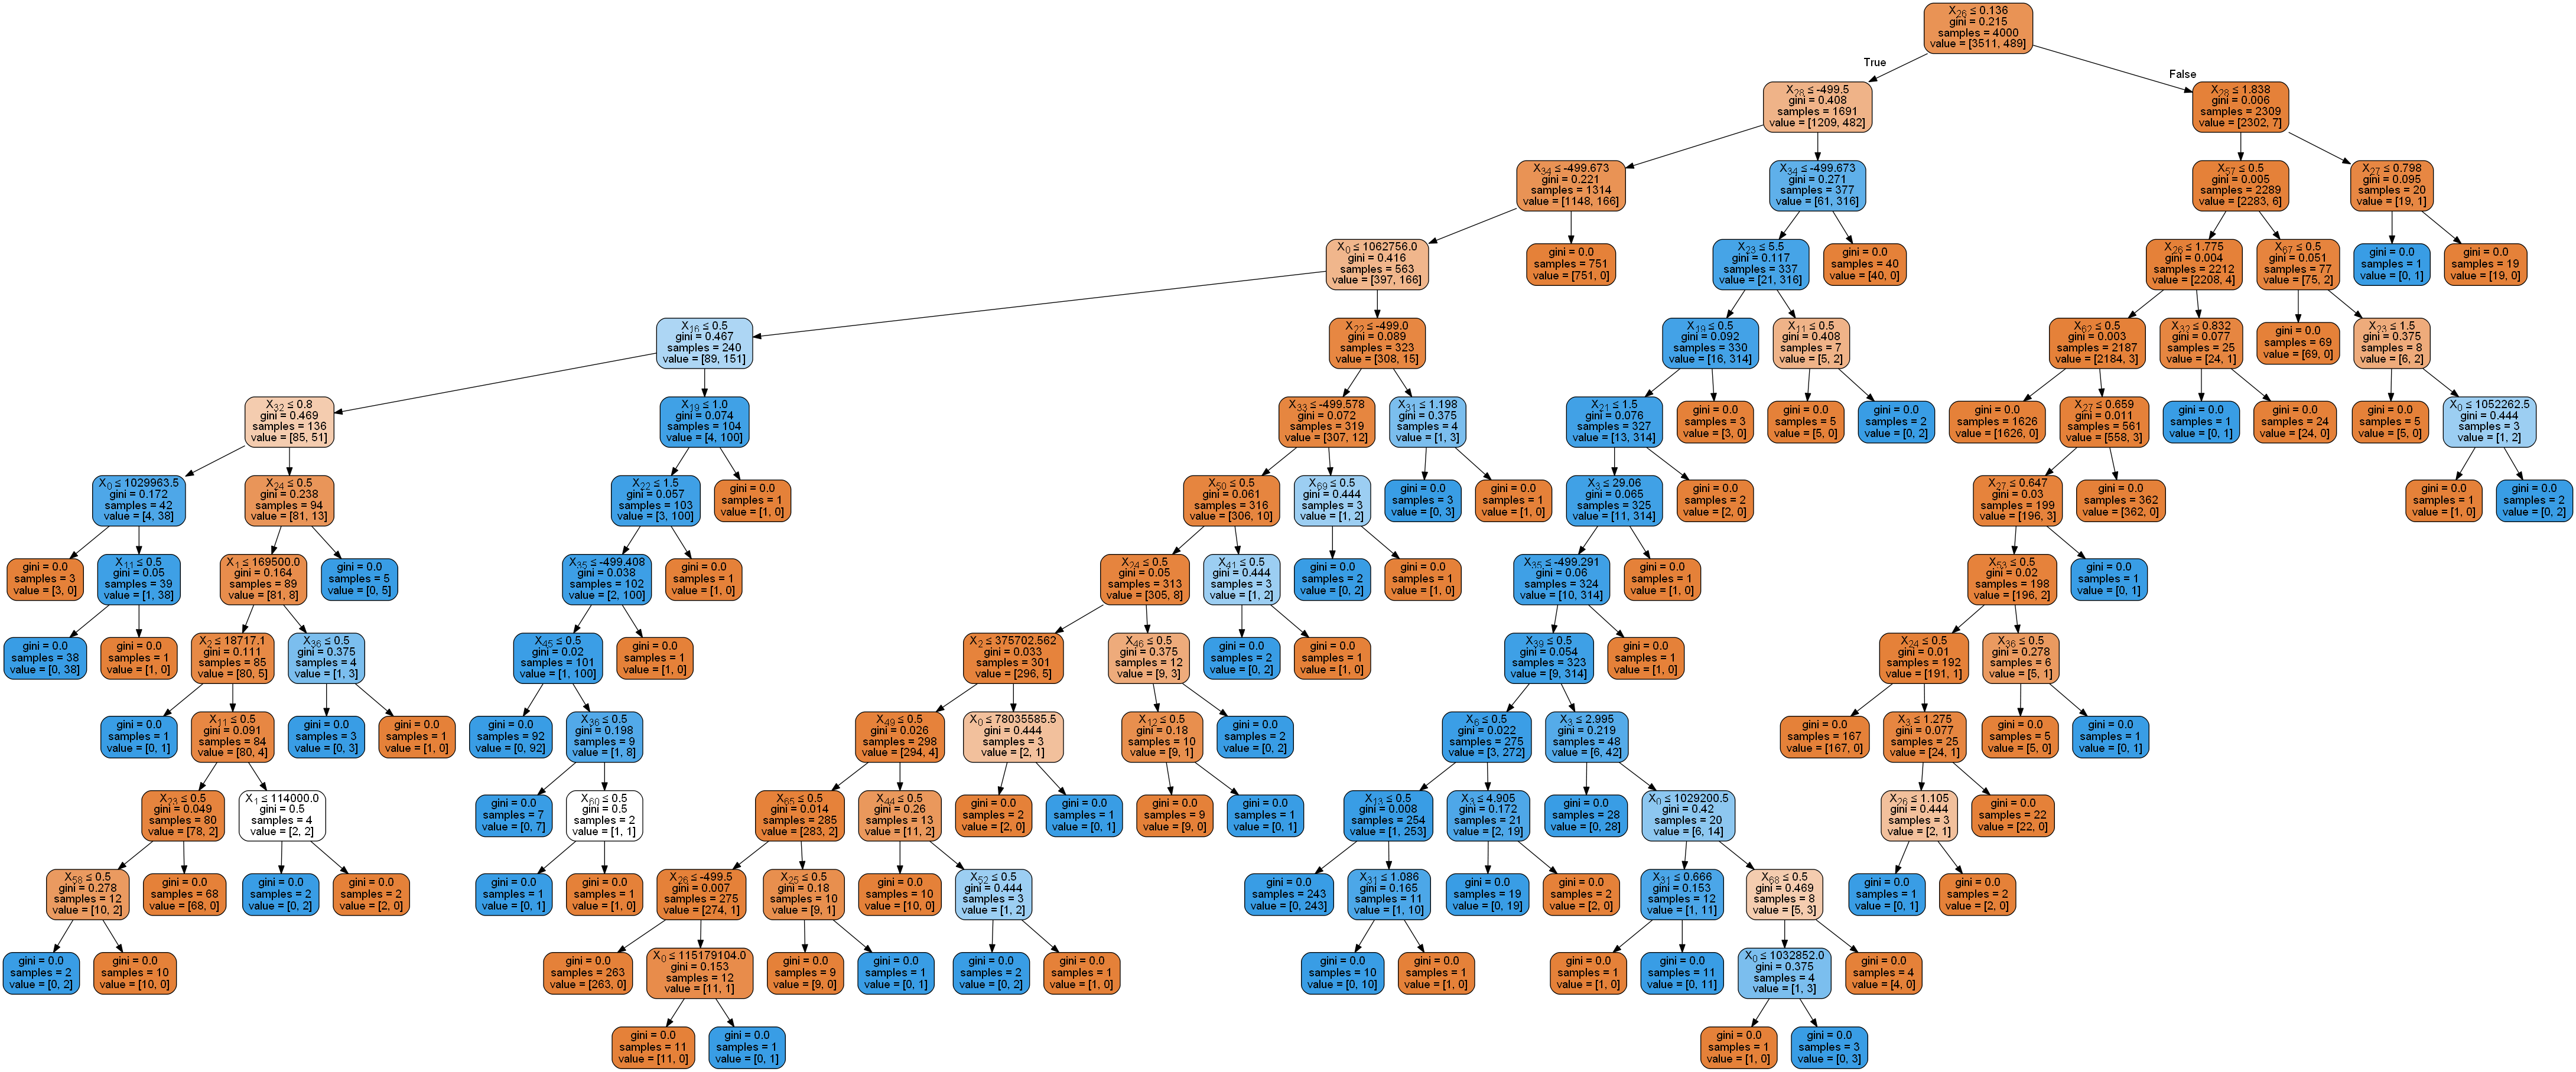

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
ynew_tree = clf.predict_proba(Xnew)
ynew_tree

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
active = [x[1] for i,x in enumerate(ynew_tree) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew_tree) if data_y.Status.values[4000+i]]

(array([ 5.11627907,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 34.88372093]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

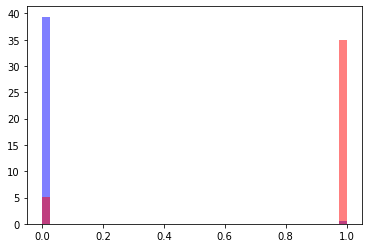

In [33]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Resigned', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 2), random_state=1, verbose=True)

In [36]:
clf2.fit(data_x_numeric[:4000], data_y.Status[:4000])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [37]:
[coef.shape for coef in clf2.coefs_]

[(71, 10), (10, 2), (2, 1)]

In [38]:
ynew_ml = clf2.predict_proba(data_x_numeric[4000:])

In [39]:
Xnew = data_x_numeric.values[4000:]
# make a prediction
ynew_ml = clf2.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
    if data_y.Status.values[4000+i]:
        print("X=%s, Predicted=%s, Actual=%s" % (Xnew[i][1], ynew_ml[i], data_y.Status.values[4000+i]))

X=44000.0, Predicted=[0. 1.], Actual=True
X=105160.0, Predicted=[0. 1.], Actual=True
X=61310.0, Predicted=[0. 1.], Actual=True
X=46000.0, Predicted=[0. 1.], Actual=True
X=134000.0, Predicted=[0. 1.], Actual=True
X=101000.0, Predicted=[0. 1.], Actual=True
X=230220.0, Predicted=[0. 1.], Actual=True
X=62000.0, Predicted=[0. 1.], Actual=True
X=105160.0, Predicted=[0. 1.], Actual=True
X=36540.0, Predicted=[0. 1.], Actual=True
X=58000.0, Predicted=[0. 1.], Actual=True
X=217800.0, Predicted=[0. 1.], Actual=True
X=77400.0, Predicted=[0. 1.], Actual=True
X=46000.0, Predicted=[0. 1.], Actual=True
X=1000000000.0, Predicted=[1. 0.], Actual=True
X=81310.0, Predicted=[0. 1.], Actual=True
X=1000000000.0, Predicted=[1. 0.], Actual=True
X=81310.0, Predicted=[0. 1.], Actual=True
X=58000.0, Predicted=[0. 1.], Actual=True
X=95500.0, Predicted=[0. 1.], Actual=True
X=95500.0, Predicted=[0. 1.], Actual=True
X=1000000000.0, Predicted=[1. 0.], Actual=True
X=134000.0, Predicted=[0. 1.], Actual=True
X=1000000000

In [40]:
active = [x[1] for i,x in enumerate(ynew_ml) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew_ml) if data_y.Status.values[4000+i]]

(array([ 5.11627907,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 34.88372093]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

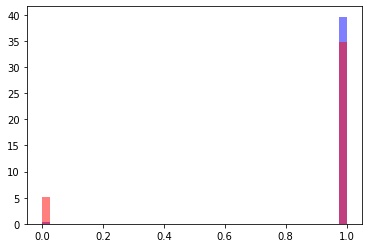

In [41]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Resigned', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")

In [42]:
# data_x_numeric.to_pickle("./data_x_numeric.pkl")

In [43]:
# data_y.to_pickle("./data_y.pkl")

In [44]:
data_x_numeric.head()

,WWID,Compensation_Range___Midpoint,Total_Base_Pay___Local,Length_of_Service_in_Years_inclu,Job_Function__IA__Host_All_Other=Facilities,Job_Function__IA__Host_All_Other=Finance,Job_Function__IA__Host_All_Other=General Administration,Job_Function__IA__Host_All_Other=General Management,Job_Function__IA__Host_All_Other=Human Resources,Job_Function__IA__Host_All_Other=Info Technology,...,Manager_Rating_2_W=3,Manager_Rating_2_W=4,Manager_Rating_2_H=3,Manager_Rating_2_H=4,Manager_Rating_3_W=2,Manager_Rating_3_W=3,Manager_Rating_3_W=4,Manager_Rating_3_H=3,Manager_Rating_3_H=4,Job_Function_encoded
0,1011603,150000,147233.44,8.14,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
1,75582905,81000,103625.60,13.61,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,75361062,237000,268403.44,28.45,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
3,84004223,62000,50892.43,10.37,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,1030941,150000,134733.44,5.39,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2


In [45]:
data_x_numeric.shape[0]

4668

In [46]:
for i,c in enumerate(data_x_numeric.columns):
    print(i, c)

0 WWID
1 Compensation_Range___Midpoint
2 Total_Base_Pay___Local
3 Length_of_Service_in_Years_inclu
4 Job_Function__IA__Host_All_Other=Facilities
5 Job_Function__IA__Host_All_Other=Finance
6 Job_Function__IA__Host_All_Other=General Administration
7 Job_Function__IA__Host_All_Other=General Management
8 Job_Function__IA__Host_All_Other=Human Resources
9 Job_Function__IA__Host_All_Other=Info Technology
10 Job_Function__IA__Host_All_Other=Legal
11 Job_Function__IA__Host_All_Other=Marketing
12 Job_Function__IA__Host_All_Other=Public Affairs
13 Job_Function__IA__Host_All_Other=Quality
14 Job_Function__IA__Host_All_Other=R&D
15 Job_Function__IA__Host_All_Other=Regulatory Affairs
16 Job_Function__IA__Host_All_Other=Sales
17 Job_Function__IA__Host_All_Other=Strategic Planning
18 Promotion
19 Demotion
20 Lateral
21 Cross_Move
22 Trainings_Completed
23 Mgr_Change
24 SkipLevel_Mgr_Change
25 Rehire_YN
26 _018_Planned_as_a___of_Bonus_Tar
27 _017_Planned_as_a___of_Bonus_Tar
28 _016_Planned_as_a___of_B